# <center>X Education - Lead Prediction</center>

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.<BR>
Company gets leads from different sources.<BR>
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.<BR>
Company want to build model which will predict Lead score and based on High Lead score they can improve conversation rate, which is targeted to 80%.

### Load Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_column', 100)

In [4]:
leadsDF = pd.read_csv("Leads.csv")
leadsDF.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Cleaning

In [5]:
leadsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
leadsDF.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leadsDF.drop(columns=leadsDF.describe().columns).describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,bb2c1e72-432a-4a99-81c1-a2429564ff55,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [8]:
#Data imbalance check on Target Variable
leadsDF['Converted'].value_counts() / leadsDF.index.size

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [9]:
#Check for "Select" as value in specified column, if found replace with 'None'
leadsDF = leadsDF.applymap(lambda v : None if str(v).lower() == "select" else v) 

In [10]:
#Print Missing value count and Percent of data missing
#Create data frame which have rows for each category of that column.
#Calculate each value count for each category and contribution of that category towards lead conversion.
def GetValueCount_ConvertionRatio(colName):
    tempDF = leadsDF[[colName, 'Converted']].copy()
    
    print("Missing Data Count:", tempDF[colName].isnull().sum(), "(" ,round(tempDF[colName].isnull().sum() / tempDF.index.size * 100, 2),"%)")

    # Temporarily replace NaN/None value with placeholder "NAN", so we can include in value count & group by 
    tempDF = tempDF[[colName, 'Converted']].fillna('NAN')
   
    # Including NaN value count
    valCountSer = tempDF[colName].value_counts() 
    df = pd.DataFrame(data=valCountSer)

    df = df.merge(tempDF.groupby(by=colName, observed=False ).sum()[['Converted']], left_index=True, right_index=True)
    
    df[colName + ' %'] = round(df[colName] / df[colName].sum() * 100, 2)
    df['Conversion %'] = round(df['Converted'] / df['Converted'].sum() * 100, 2)
   
    return df.sort_values(by=colName, ascending=False)

In [11]:
#Missing Data Percent
(leadsDF.isnull().sum() / leadsDF.index.size * 100) [leadsDF.isnull().sum() / leadsDF.index.size * 100 > 0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
City                                             39.707792
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

In [12]:
#Dropping Columns with More than 70 % Missing values
colsToBeRemove = ['Lead Profile','How did you hear about X Education']

In [13]:
GetValueCount_ConvertionRatio('Lead Quality')

Missing Data Count: 4767 ( 51.59 %)


,Lead Quality,Converted,Lead Quality %,Conversion %
NAN,4767,1024,51.59,28.76
Might be,1560,1179,16.88,33.11
Not Sure,1092,266,11.82,7.47
High in Relevance,637,603,6.89,16.93
Worst,601,12,6.50,0.34
Low in Relevance,583,477,6.31,13.40


In [14]:
GetValueCount_ConvertionRatio('Asymmetrique Profile Index')

Missing Data Count: 4218 ( 45.65 %)


,Asymmetrique Profile Index,Converted,Asymmetrique Profile Index %,Conversion %
NAN,4218,1653,45.65,46.42
02.Medium,2788,848,30.17,23.81
01.High,2203,1045,23.84,29.35
03.Low,31,15,0.34,0.42


**Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score** these feature variable having 46% - 52% of missing values.<BR>
Conversion percent of missing data is approx. 50%, so if we drop rows then we missed or positive cases.<BR>
Hence we are not dropping approx. 50% row/observation, so will drop thses columns, which will defiantly not contribute towards model building because of missing data.

In [15]:
colsToBeRemove.extend(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [16]:
GetValueCount_ConvertionRatio('Country')

Missing Data Count: 2461 ( 26.63 %)


,Country,Converted,Country %,Conversion %
India,6492,2401,70.26,67.42
NAN,2461,1076,26.63,30.22
United States,69,18,0.75,0.51
United Arab Emirates,53,20,0.57,0.56
Singapore,24,11,0.26,0.31
Saudi Arabia,21,4,0.23,0.11
United Kingdom,15,5,0.16,0.14
Australia,13,3,0.14,0.08
Qatar,10,1,0.11,0.03
Bahrain,7,4,0.08,0.11


In [17]:
GetValueCount_ConvertionRatio('City')

Missing Data Count: 3669 ( 39.71 %)


,City,Converted,City %,Conversion %
NAN,3669,1257,39.71,35.30
Mumbai,3222,1309,34.87,36.76
Thane & Outskirts,752,338,8.14,9.49
Other Cities,686,276,7.42,7.75
Other Cities of Maharashtra,457,201,4.95,5.64
Other Metro Cities,380,155,4.11,4.35
Tier II Cities,74,25,0.80,0.70


**Country** data is missing for **27%** of observations and **40%** is missing for **City**.<BR>
Most of the Cities are from India, so using City data we can impute country.<BR>
Let's analyze County & City data together 

In [18]:
leadsDF[(~leadsDF['City'].isnull()) & (~leadsDF['Country'].isnull()) & (leadsDF['Country'] != 'India')][['Country','City']]

,Country,City
87,Kuwait,Mumbai
103,Oman,Mumbai
243,United States,Mumbai
356,Bahrain,Other Cities
411,United States,Other Metro Cities
419,Singapore,Other Metro Cities
425,United Kingdom,Mumbai
433,Qatar,Other Cities
445,Australia,Mumbai
483,Ghana,Other Cities


Looks like **City** data is not reliable as same city **"Mumbai"** is linked against multiple countries.<BR>
So will drop City Column.

In [19]:
colsToBeRemove.extend(['City'])

In [20]:
GetValueCount_ConvertionRatio('What is your current occupation')

Missing Data Count: 2690 ( 29.11 %)


,What is your current occupation,Converted,What is your current occupation %,Conversion %
Unemployed,5600,2441,60.61,68.55
NAN,2690,370,29.11,10.39
Working Professional,706,647,7.64,18.17
Student,210,78,2.27,2.19
Other,16,10,0.17,0.28
Housewife,10,10,0.11,0.28
Businessman,8,5,0.09,0.14


In [21]:
GetValueCount_ConvertionRatio('What matters most to you in choosing a course')

Missing Data Count: 2709 ( 29.32 %)


,What matters most to you in choosing a course,Converted,What matters most to you in choosing a course %,Conversion %
Better Career Prospects,6528,3190,70.65,89.58
NAN,2709,370,29.32,10.39
Flexibility & Convenience,2,1,0.02,0.03
Other,1,0,0.01,0.00


There **29%** of missing value in feature variable **What matters most to you in choosing a course**.<BR>
If we try to impute missing value here using Mod, then value would be **Better Career Prospects** and If we remove missing value observations then also **Better Career Prospects** category holds most of the data **(71%)**.<BR>
It means this feature will not help in model building, so we can drop this column.<BR>

Similar kind of trend in **What is your current occupation** & **Country** feature variable.

In [22]:
colsToBeRemove.extend(['Country', 'What is your current occupation', 'What matters most to you in choosing a course'])

In [23]:
GetValueCount_ConvertionRatio('Specialization')

Missing Data Count: 3380 ( 36.58 %)


,Specialization,Converted,Specialization %,Conversion %
NAN,3380,969,36.58,27.21
Finance Management,976,436,10.56,12.24
Human Resource Management,848,388,9.18,10.90
Marketing Management,838,408,9.07,11.46
Operations Management,503,238,5.44,6.68
Business Administration,403,179,4.36,5.03
IT Projects Management,366,140,3.96,3.93
Supply Chain Management,349,151,3.78,4.24
"Banking, Investment And Insurance",338,167,3.66,4.69
Media and Advertising,203,85,2.20,2.39


In [24]:
GetValueCount_ConvertionRatio('Tags')

Missing Data Count: 3353 ( 36.29 %)


,Tags,Converted,Tags %,Conversion %
NAN,3353,836,36.29,23.48
Will revert after reading the email,2072,2007,22.42,56.36
Ringing,1203,34,13.02,0.95
Interested in other courses,513,13,5.55,0.37
Already a student,465,3,5.03,0.08
Closed by Horizzon,358,356,3.87,10.00
switched off,240,4,2.60,0.11
Busy,186,105,2.01,2.95
Lost to EINS,175,171,1.89,4.80
Not doing further education,145,1,1.57,0.03


Here is some confusion between, dropping Column or Dropping Rows for **Specialization** & **Tags** variable.

In [25]:
#Check total no of rows with missing value in either 'Specialization' or 'Tags' 
leadsDF[(leadsDF['Specialization'].isnull()) | (leadsDF['Tags'].isnull())].shape

(4805, 37)

Dropping rows might not be good idea, as we lose more than 50% of data, So will drop both the columns.

In [26]:
colsToBeRemove.extend(['Specialization', 'Tags'])

In [27]:
leadsDF_BefColDrop = leadsDF.copy()
leadsDF.drop(labels=colsToBeRemove, inplace=True, axis=1)

In [28]:
(leadsDF.isnull().sum() / leadsDF.index.size*100) [leadsDF.isnull().sum() / leadsDF.index.size > 0]

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

In [29]:
#Drop rows with any missing value
leadsDF.dropna(inplace=True)
leadsDF.isnull().sum() / leadsDF.index.size*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [30]:
print("Data Before Cleanup : ", leadsDF_BefColDrop.shape)
print("Data After Cleanup : ", leadsDF.shape)

Data Before Cleanup :  (9240, 37)
Data After Cleanup :  (9074, 24)


In [31]:
#Duplicate Data Check
leadsDF[leadsDF.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [32]:
leadsDF[leadsDF['Lead Number'].duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [33]:
leadsDF.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [34]:
leadsDF.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [35]:
leadsDF.drop(labels=leadsDF.describe().columns, axis=1).describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,9074,4,21,2,2,17,2,1,2,2,2,2,2,1,1,1,1,2,16
top,bb2c1e72-432a-4a99-81c1-a2429564ff55,Landing Page Submission,Google,No,No,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4885,2868,8358,9072,3432,9060,9074,9072,9073,9073,9070,9067,9074,9074,9074,9074,6186,3267


Describe method on categorical feature variable shows, total unique categories available in that particular feature and more frequent value of that feature or MOD of that feature.<BR>
Most of the column like **Do Not Call, Search, Newspaper Article, etc.** having only 2 categories **Yes/No** and almost 99%-100% data have **No** value. Such columns does not help in model building as there is no variance explained by these features.

Also there are few columns like **Magazine, Receive More Updates About Our Courses, etc.** have only one categorical value for all rows, so these columns also not help in model building.<BR>
Will drop all such features.

In [36]:
leadsDF.drop(labels=['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace=True)

### Derive Variable

In [37]:
GetValueCount_ConvertionRatio('Lead Source')

Missing Data Count: 0 ( 0.0 %)


,Lead Source,Converted,Lead Source %,Conversion %
Google,2868,1147,31.61,33.39
Direct Traffic,2543,818,28.03,23.81
Olark Chat,1753,448,19.32,13.04
Organic Search,1154,436,12.72,12.69
Reference,443,410,4.88,11.94
Welingak Website,129,127,1.42,3.70
Referral Sites,125,31,1.38,0.90
Facebook,31,9,0.34,0.26
bing,6,1,0.07,0.03
google,5,0,0.06,0.00


Almost 80% data explained by top 4 lead score **Google, Direct Traffic, Olark Chat, Organic Search**.<BR>
Will create new category called **Other** and assign this category to remaining 20% rows.

In [38]:
leadsDF['Lead Source'] = leadsDF['Lead Source'].apply (lambda v : v if v in (['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference']) else 'Other Lead Source')
GetValueCount_ConvertionRatio('Lead Source')

Missing Data Count: 0 ( 0.0 %)


,Lead Source,Converted,Lead Source %,Conversion %
Google,2868,1147,31.61,33.39
Direct Traffic,2543,818,28.03,23.81
Olark Chat,1753,448,19.32,13.04
Organic Search,1154,436,12.72,12.69
Reference,443,410,4.88,11.94
Other Lead Source,313,176,3.45,5.12


In [39]:
GetValueCount_ConvertionRatio('Last Activity')

Missing Data Count: 0 ( 0.0 %)


,Last Activity,Converted,Last Activity %,Conversion %
Email Opened,3432,1250,37.82,36.39
SMS Sent,2716,1705,29.93,49.64
Olark Chat Conversation,972,84,10.71,2.45
Page Visited on Website,640,151,7.05,4.40
Converted to Lead,428,54,4.72,1.57
Email Bounced,312,16,3.44,0.47
Email Link Clicked,267,73,2.94,2.13
Form Submitted on Website,116,28,1.28,0.82
Unreachable,90,29,0.99,0.84
Unsubscribed,59,14,0.65,0.41


In [40]:
#Will apply same logic as Lead Source
leadsDF['Last Activity'] = leadsDF['Last Activity'].apply (lambda v : v if v in (['Email Opened', 'SMS Sent', 'Olark Chat Conversation', 'Page Visited on Website']) else 'Other Last Activity')
GetValueCount_ConvertionRatio('Last Activity')

Missing Data Count: 0 ( 0.0 %)


,Last Activity,Converted,Last Activity %,Conversion %
Email Opened,3432,1250,37.82,36.39
SMS Sent,2716,1705,29.93,49.64
Other Last Activity,1314,245,14.48,7.13
Olark Chat Conversation,972,84,10.71,2.45
Page Visited on Website,640,151,7.05,4.40


In [41]:
GetValueCount_ConvertionRatio('Last Notable Activity')

Missing Data Count: 0 ( 0.0 %)


,Last Notable Activity,Converted,Last Notable Activity %,Conversion %
Modified,3267,680,36.00,19.80
Email Opened,2823,1042,31.11,30.33
SMS Sent,2152,1489,23.72,43.35
Page Visited on Website,318,93,3.50,2.71
Olark Chat Conversation,183,25,2.02,0.73
Email Link Clicked,173,45,1.91,1.31
Email Bounced,60,9,0.66,0.26
Unsubscribed,45,12,0.50,0.35
Unreachable,32,22,0.35,0.64
Had a Phone Conversation,14,13,0.15,0.38


In [42]:
leadsDF['Last Notable Activity'] = leadsDF['Last Notable Activity'].apply (lambda v : v if v in (['Modified', 'Email Opened', 'SMS Sent']) else 'Other Last Notable Activity')
GetValueCount_ConvertionRatio('Last Notable Activity')

Missing Data Count: 0 ( 0.0 %)


,Last Notable Activity,Converted,Last Notable Activity %,Conversion %
Modified,3267,680,36.00,19.80
Email Opened,2823,1042,31.11,30.33
SMS Sent,2152,1489,23.72,43.35
Other Last Notable Activity,832,224,9.17,6.52


## EDA

### Quantitative Variable Univariate & Bivariate Analysis

In [43]:
leadsDF.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.022830,0.022094,0.018360,0.058703
Converted,0.022830,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.022094,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.018360,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.058703,0.000260,0.511068,0.318350,1.000000


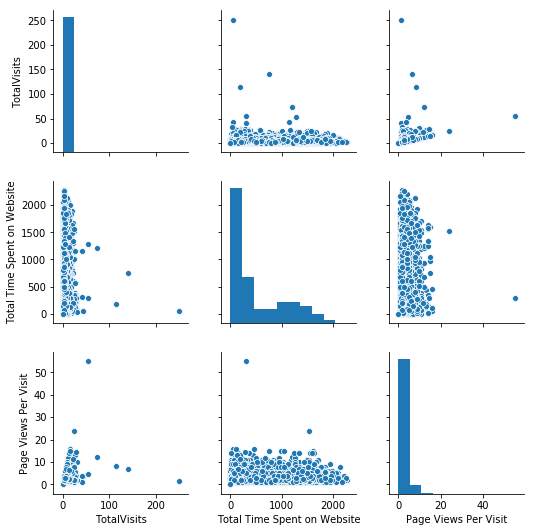

In [44]:
sns.pairplot(data=leadsDF[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

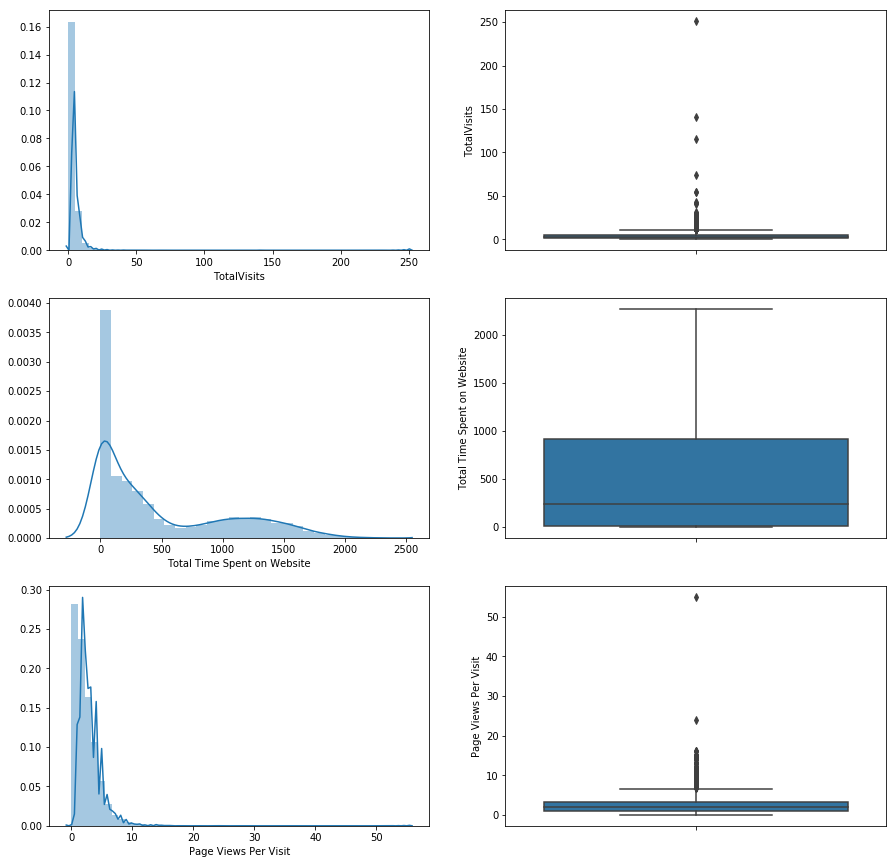

In [45]:
plt.figure(figsize=(15,15))
index = 1
lstCols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for c in lstCols:
    plt.subplot(3,2,index)
    sns.distplot(leadsDF[c])
    
    index+=1
    plt.subplot(3,2,index)
    sns.boxplot(y=leadsDF[c])
    
    index+=1

In [46]:
leadsDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


**Total Visits & Page View Per Visit** feature variable distribution plot **Skewed to Right**, which shows outlier on higher value of data.<BR>
Will remove data above **0.95 Percentile.**

In [47]:
print("Data Before Removing Outliers : ", leadsDF.shape)
leadsDF = leadsDF[(leadsDF['TotalVisits'] <= 10) & (leadsDF['Page Views Per Visit'] <= 6)]
print("Data After Removing Outliers : ", leadsDF.shape)

Data Before Removing Outliers :  (9074, 12)
Data After Removing Outliers :  (8445, 12)


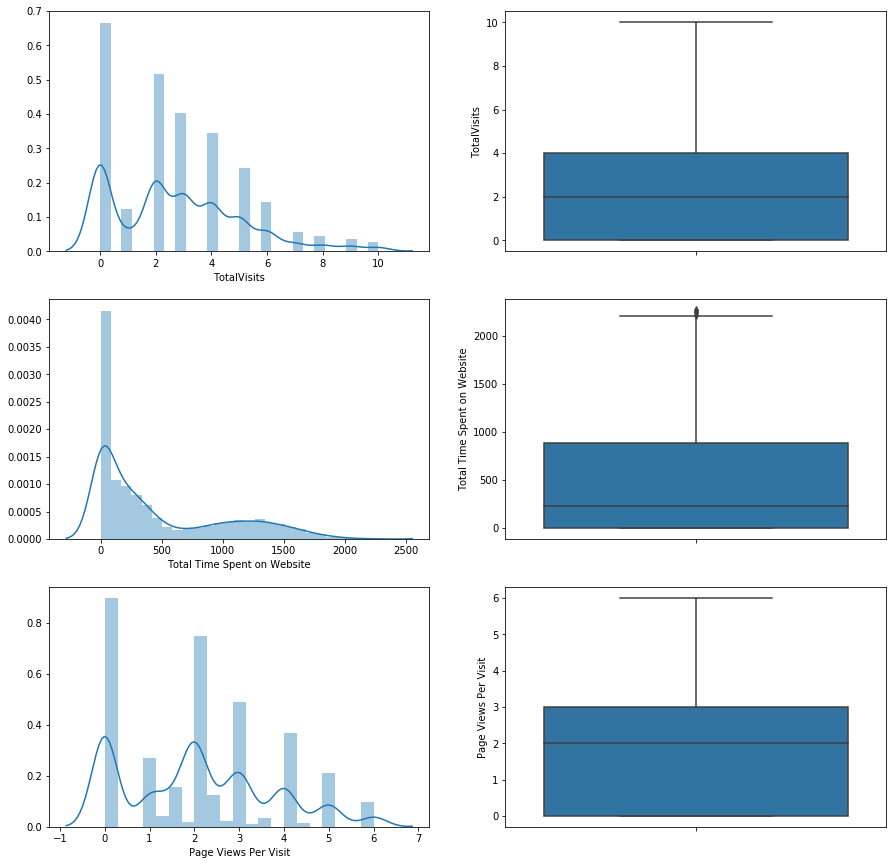

In [48]:
plt.figure(figsize=(15,15))
index = 1
lstCols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for c in lstCols:
    plt.subplot(3,2,index)
    sns.distplot(leadsDF[c])
    
    index+=1
    plt.subplot(3,2,index)
    sns.boxplot(y=leadsDF[c])
    
    index+=1

### Qualitative Variable Univariate & Bivariate Analysis

In [49]:
leadsDF.drop(labels=leadsDF.describe().columns, axis=1).describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
count,8445,8445,8445,8445,8445,8445,8445
unique,8445,4,6,2,5,2,4
top,b5de0fc9-c8f8-4362-bfb6-f0b9b374c3ac,Landing Page Submission,Google,No,Email Opened,No,Modified
freq,1,4407,2709,7795,3184,5910,3108


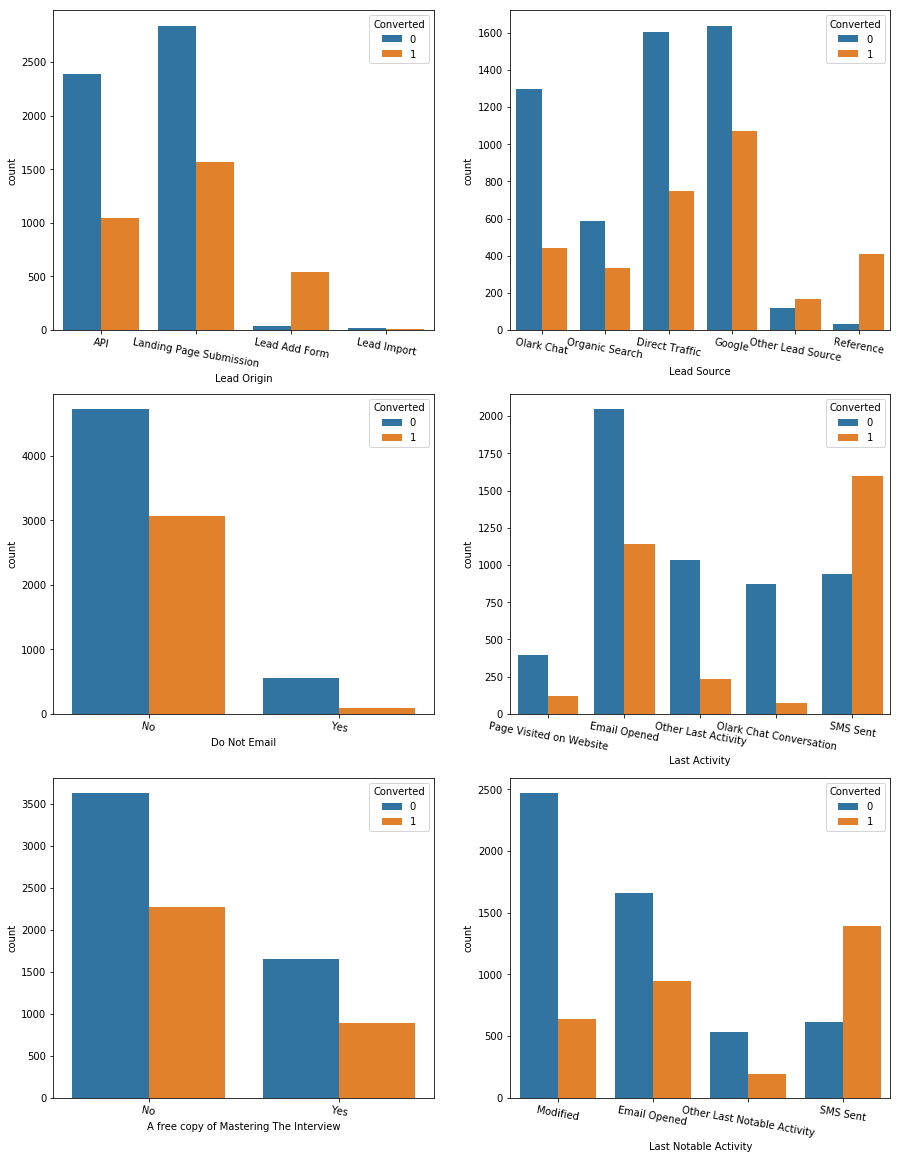

In [50]:
row = 0
col = 0
fix, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))

lstCols = ['Lead Origin','Lead Source','Do Not Email','Last Activity','A free copy of Mastering The Interview','Last Notable Activity']

for c in lstCols:
    sns.countplot(data=leadsDF, x=c, hue='Converted', ax=ax[row, col])
    
    ax[row,col] .set_xticklabels(ax[row,col].get_xticklabels(), rotation = -10)
    col+=1
    
    if col > 1:
        row+=1
        col = 0

**Lead Origin :** Landing Page Submission & AP category have more number of submission, also observations with Lead Add Form category have more success ration.<BR>
**Lead Source :** Google & Direct Traffic observations have good conversion ration than other source.<BR>
**Do Not Email :** If student doesn't like to receive mail from institute there are very less changes that person will enroll for the course. Same trend can be seen in plot.<BR>
**Last Activity :** Email Opened & SMS Sent, these 2 categories have more conversation than other.<BR>
**Last Notable Activity :** Again Email & SMS Sent have good conversation rate, Looks like these 2 category have correlation with categories of Last Activity.<BR>
**A free copy of Mastering The Interview :** There is no specific trend here, Total volume in category **Yes** is high as compare to **No**, same trend in conversation ratio.

### Categorical Variable Dummification

In [51]:
leadsDF['Do Not Email'] = leadsDF['Do Not Email'].apply(lambda x : 1 if str(x).lower() == 'yes' else 0)
leadsDF['A free copy of Mastering The Interview'] = leadsDF['A free copy of Mastering The Interview'].apply(lambda x : 1 if str(x).lower() == 'yes' else 0)

leadsDF = pd.get_dummies(leadsDF, columns=['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], prefix=['LO', 'LS', 'LA', 'LNA'], drop_first=True)
leadsDF.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Other Lead Source,LS_Reference,LA_Olark Chat Conversation,LA_Other Last Activity,LA_Page Visited on Website,LA_SMS Sent,LNA_Modified,LNA_Other Last Notable Activity,LNA_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [52]:
GetValueCount_ConvertionRatio('A free copy of Mastering The Interview')

Missing Data Count: 0 ( 0.0 %)


,A free copy of Mastering The Interview,Converted,A free copy of Mastering The Interview %,Conversion %
0,5910,2278,69.98,71.97
1,2535,887,30.02,28.03


In [53]:
leadsDF.shape

(8445, 23)

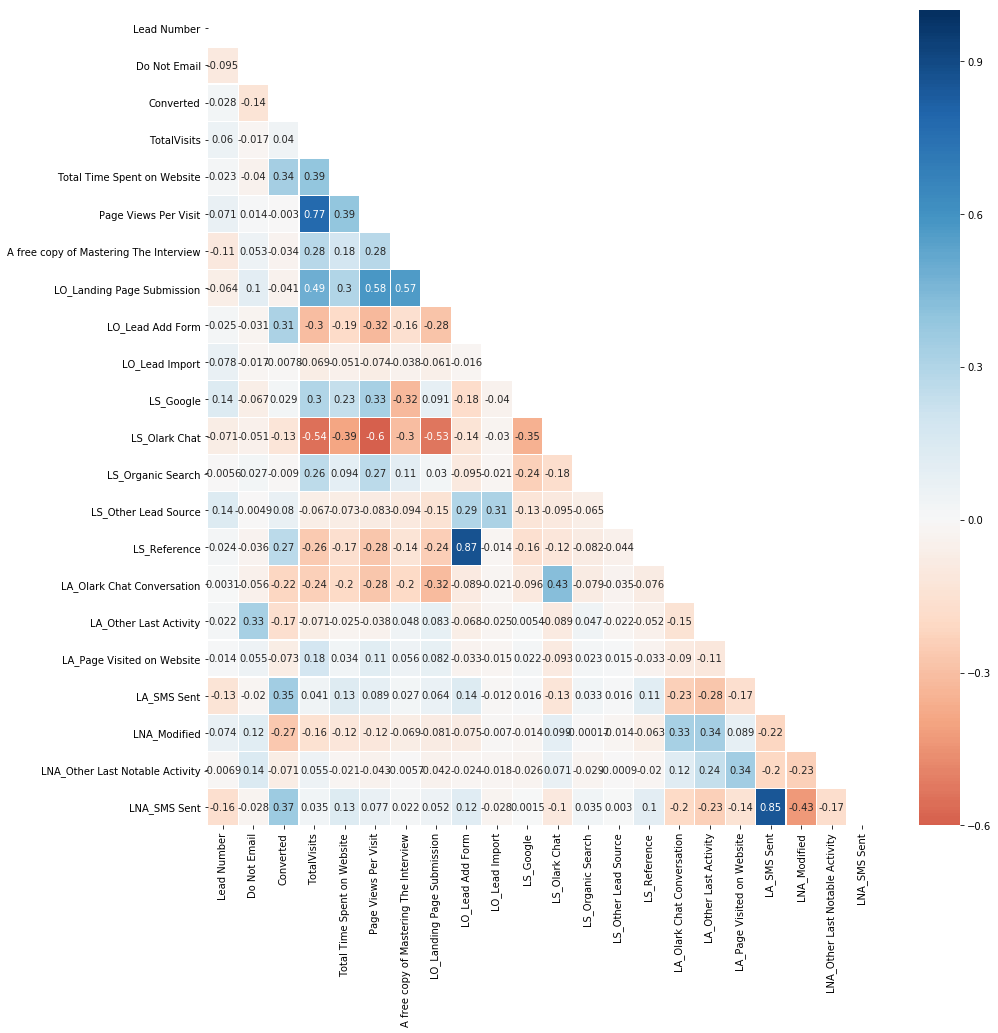

In [54]:
#Check correlation using Headmap
corr = leadsDF.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', center=0, linewidths=0.1)
plt.show()

Some features are strongly correlated with each other, like **LS_Reference & LS_Lead Add Form, Page View Per Visit & Total Visit, LNA_SMS Sent & LA_SMS Sent**<BR>
More variance explained by **LA_SMS Sent** then **LNA_SMS Sent**, so will drop **LNA_SMS Sent**, using same logic will drop **LS_Reference**.<BR>
Will drop **Page Views Per Visit** from other correlated group.

In [55]:
leadsDF.drop(labels=['Page Views Per Visit', 'LNA_SMS Sent', 'LS_Reference'], inplace=True, axis=1)

In [56]:
finalDf = leadsDF.copy()
leadsDF.shape

(8445, 20)

## Model Building

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import statsmodels.api as sm

In [58]:
leadsDF.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Other Lead Source,LA_Olark Chat Conversation,LA_Other Last Activity,LA_Page Visited on Website,LA_SMS Sent,LNA_Modified,LNA_Other Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,0,1,0,0,1,0,0,0,0,1,0,0,1,0


Will remove **ProspectID & Lead Number**.<BR>
**Total Visits & Total Time Spent on Website** columns have large scale values which might impact our modelling process, so will scale values using Standard Scaler.

In [59]:
leadsDF.drop(labels=['Prospect ID','Lead Number'], axis=1, inplace=True)

**Generic Method to get LR Model & VIF score**

In [60]:
def GetLRModel(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial()).fit()
    print(lr.summary())
    return (lr, X_train_lm)

In [61]:
def GetVIFScore(df):
    vifScore = pd.DataFrame()
    vifScore['Features'] = df.columns
    vifScore['VIF'] = [round(variance_inflation_factor(df.values, i),2) for i in range(df.shape[1])]
    return vifScore

In [62]:
#Split data in train & test set
X_train, X_test = train_test_split(leadsDF, test_size = 0.30, random_state = 100)

In [63]:
y_train = X_train.pop('Converted')
y_test = X_test.pop('Converted')

In [64]:
sd = StandardScaler()
X_train[['Total Time Spent on Website', 'TotalVisits']] = sd.fit_transform(X_train[['Total Time Spent on Website', 'TotalVisits']])
X_test[['Total Time Spent on Website', 'TotalVisits']] = sd.transform(X_test[['Total Time Spent on Website', 'TotalVisits']])

In [65]:
X_train.shape

(5911, 17)

### Feature Selection
Will use RFE (Recursive Feature Elimination) technique to select most important features from **17** different features.

In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
rfe = RFE(lr, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)
dfRFE = pd.DataFrame(data=np.array([X_train.columns, rfe.support_, rfe.ranking_]).T, columns=['Feature', 'Support', 'Rank'])
dfRFE.sort_values(by='Rank')

,Feature,Support,Rank
0,Do Not Email,True,1
14,LA_SMS Sent,True,1
13,LA_Page Visited on Website,True,1
11,LA_Olark Chat Conversation,True,1
10,LS_Other Lead Source,True,1
15,LNA_Modified,True,1
7,LS_Google,True,1
8,LS_Olark Chat,True,1
5,LO_Lead Add Form,True,1
4,LO_Landing Page Submission,True,1


Let's build model using feature suggested by RFE.

In [68]:
cols  = list(dfRFE[dfRFE['Rank'] == 1]['Feature'])

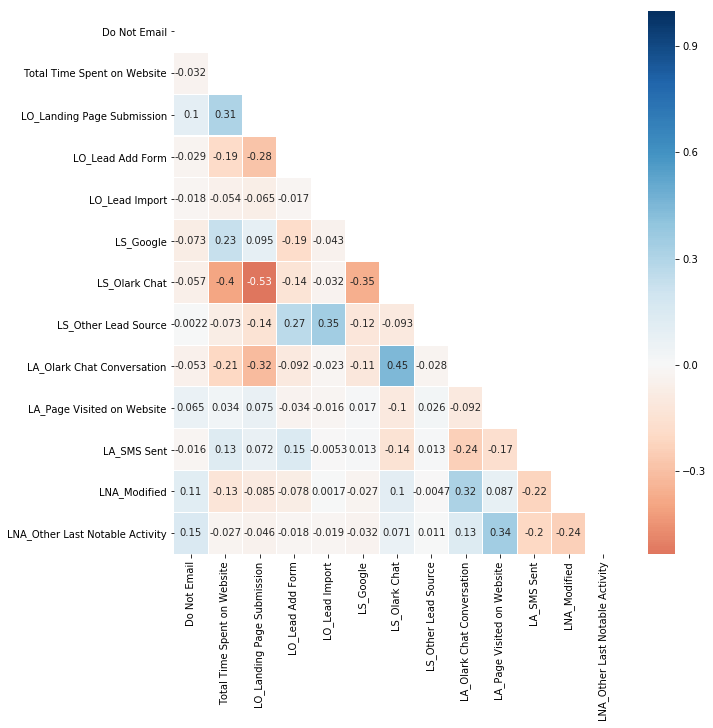

In [69]:
#Check correlation using Heatmap
corr = X_train[cols].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', center=0, linewidths=0.1)
plt.show()

In [70]:
#Check for multicollinearity using VIF score
GetVIFScore(X_train[cols])

,Features,VIF
0,Do Not Email,1.19
1,Total Time Spent on Website,1.31
2,LO_Landing Page Submission,1.84
3,LO_Lead Add Form,1.31
4,LO_Lead Import,1.16
5,LS_Google,1.43
6,LS_Olark Chat,1.77
7,LS_Other Lead Source,1.29
8,LA_Olark Chat Conversation,1.75
9,LA_Page Visited on Website,1.35


In [71]:
#First Logistic regression Model
lr_1, train_lm_1 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.6
Date:                Sun, 09 Jun 2019   Deviance:                       5317.3
Time:                        20:58:56   Pearson chi2:                 6.14e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.0352      0.106     -9.756      0.000      -1.243  

There are few insignificant features with high **P-value** is **LO_Landing Page Submission, LO_Lead Import, LA_Page Visited on Website**<BR>
Lets drop these features one by one and check updated P-value.

In [72]:
#Model - 2
cols.remove('LNA_Other Last Notable Activity')
lr_2, train_lm_2 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5898
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.1
Date:                Sun, 09 Jun 2019   Deviance:                       5318.2
Time:                        20:58:56   Pearson chi2:                 6.14e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0495      0.105     -9.991      0.000      -1.255      -0.844
D

In [73]:
#Model - 3
cols.remove('LO_Lead Import')
lr_3, train_lm_3 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5899
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.9
Date:                Sun, 09 Jun 2019   Deviance:                       5319.8
Time:                        20:58:56   Pearson chi2:                 6.13e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0394      0.105     -9.929      0.000      -1.245      -0.834
D

In [74]:
#Model - 4
cols.remove('LO_Landing Page Submission')
lr_4, train_lm_4 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5900
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.0
Date:                Sun, 09 Jun 2019   Deviance:                       5321.9
Time:                        20:58:56   Pearson chi2:                 6.12e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.1533      0.070    -16.526      0.000      -1.290      -1.016
D

In [75]:
#Now P-value of all features looks good.
#Check for multicollinearity using VIF score
GetVIFScore(X_train[cols])

,Features,VIF
0,Do Not Email,1.09
1,Total Time Spent on Website,1.29
2,LO_Lead Add Form,1.25
3,LS_Google,1.32
4,LS_Olark Chat,1.68
5,LS_Other Lead Source,1.11
6,LA_Olark Chat Conversation,1.62
7,LA_Page Visited on Website,1.09
8,LA_SMS Sent,1.34
9,LNA_Modified,1.61


VIF score of all features are low which indicates no multicollinearity in selected feature variables.

### Model Evaluation

In [76]:
def EvaluateModel(lr_model, lr_model_data, y_actual, threshold, display = False):
    pred = lr_model.predict(lr_model_data)
    pred_df = pd.DataFrame(data= {'Converted' : y_actual.values, 'Conversion_Prob':pred.values.reshape(-1)})
    pred_df['LeadId'] = y_actual.index
    pred_df['LeadScore'] = round(pred_df['Conversion_Prob'] * 100,2)
    pred_df['Prediction'] = pred_df['LeadScore'].apply(lambda x: 1 if x >= threshold else 0)
    
    accuracy = round(metrics.accuracy_score(pred_df['Converted'], pred_df['Prediction'] ), 2)
    precision = round(metrics.precision_score(pred_df['Converted'], pred_df['Prediction'] ), 2)
    recall = round(metrics.recall_score(pred_df['Converted'], pred_df['Prediction'] ), 2)
    auc = round(metrics.roc_auc_score(pred_df['Converted'], pred_df['Prediction'] ), 2)
    if display:
        print("********* " , threshold, " ***********")
        print("Accuracy : ", accuracy)
        print("Precision : ", precision)
        print("Recall : ", recall)
        print("ROC - AUC : ", auc)
    else:
        return (accuracy, precision, recall, auc, pred_df)

In [77]:
modelPerf = pd.DataFrame(columns=['Lead Score', 'Accuracy', 'Precision', 'Recall', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, recall, auc, df = EvaluateModel(lr_4, train_lm_4, y_train, i)
    modelPerf.loc[i] = [i, accuracy, precision, recall, auc]

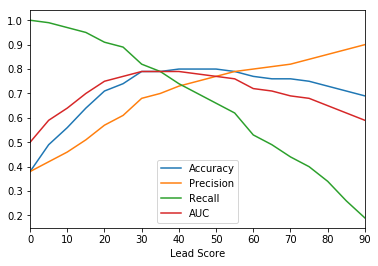

In [78]:
modelPerf.plot.line( x='Lead Score', y=['Accuracy', 'Precision', 'Recall', 'AUC'])

Good model should have maximum area under cure (Max AUC value). So **AUC** is high when lead score (probability) is between **30 - 40**<BR><BR>
As per problem statement **target lead conversion rate to be around 80%.**<BR>
It means when we predict 100 Leads as High Potential Leads then at least 80 Leads should be converted.<BR>
Which means we have to predict our True cases (Converted cases) more accurately.<BR>
Using **Precision - Recall** metrics will choose cut off with High Precision Value, which should be more than 80.

In [79]:
modelPerf[modelPerf['Precision'] >= 0.80 ] 

,Lead Score,Accuracy,Precision,Recall,AUC
60,60.0,0.77,0.80,0.53,0.72
65,65.0,0.76,0.81,0.49,0.71
70,70.0,0.76,0.82,0.44,0.69
75,75.0,0.75,0.84,0.40,0.68
80,80.0,0.73,0.86,0.34,0.65
85,85.0,0.71,0.88,0.26,0.62
90,90.0,0.69,0.90,0.19,0.59


We can choose lead score cut off as **60** to have at least **80%** correct prediction of Positive/True cases.<BR>
AUC value is also good: 0.72

In [80]:
accuracy, precision, recall, auc, predictDF = EvaluateModel(lr_4, train_lm_4, y_train,60)
FP, TP, thresholds = metrics.roc_curve( predictDF['Converted'], predictDF['Conversion_Prob'], drop_intermediate = False )

Text(0, 0.5, 'True Positive Rate')

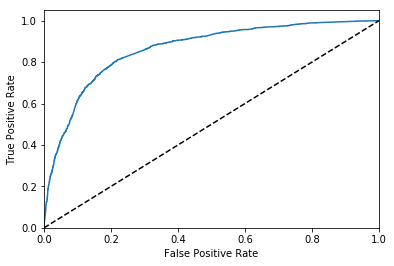

In [81]:
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ROC curve is away from 45-degree diagonal line.<BR>
And it's closer to Left & Top border which is indicator of strong model.

In [82]:
EvaluateModel(lr_4, train_lm_4, y_train, 60, True)

*********  60  ***********
Accuracy :  0.77
Precision :  0.8
Recall :  0.53
ROC - AUC :  0.72


In [83]:
#Predict Chance of Conversion (Probability of Conversion) on Test set using 4th Model
X_test = X_test[cols]
test_lm = sm.add_constant(X_test)
EvaluateModel(lr_4, test_lm, y_test,60, True)

*********  60  ***********
Accuracy :  0.78
Precision :  0.81
Recall :  0.55
ROC - AUC :  0.74


On test data **Accuracy (0.78) & Precision score (0.81)** is better than train data.<BR>

Generate Lead Score For all Data Set.

In [84]:
df = finalDf.copy()
df[['Total Time Spent on Website', 'TotalVisits']] = sd.transform(df[['Total Time Spent on Website', 'TotalVisits']])
y_train = df['Converted']
X_train = df[cols]
test_lm = sm.add_constant(X_train)
accuracy, precision, recall, auc, predictDF = EvaluateModel(lr_4, test_lm, y_train,60)

In [85]:
print(predictDF.shape)
predictDF.head()

(8445, 5)


,Converted,Conversion_Prob,LeadId,LeadScore,Prediction
0,0,0.116645,0,11.66,0
1,0,0.323457,1,32.35,0
2,1,0.728395,2,72.84,1
3,0,0.094162,3,9.42,0
4,1,0.573003,4,57.30,0


In [86]:
print(finalDf.shape)
finalDf.head()

(8445, 20)


,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Other Lead Source,LA_Olark Chat Conversation,LA_Other Last Activity,LA_Page Visited on Website,LA_SMS Sent,LNA_Modified,LNA_Other Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [87]:
finalDf = pd.concat([finalDf, predictDF[['LeadScore','Prediction']]], axis=1)

In [88]:
finalDf.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Other Lead Source,LA_Olark Chat Conversation,LA_Other Last Activity,LA_Page Visited on Website,LA_SMS Sent,LNA_Modified,LNA_Other Last Notable Activity,LeadScore,Prediction
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.66,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,0.0,0.0,5.0,674.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.35,0.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,0.0,1.0,2.0,1532.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.84,1.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,0.0,0.0,1.0,305.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.42,0.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,0.0,1.0,2.0,1428.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,57.30,0.0


In [89]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5900
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.0
Date:                Sun, 09 Jun 2019   Deviance:                       5321.9
Time:                        20:58:59   Pearson chi2:                 6.12e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.1533      0.070    -16.526      0.000      -1.290      -1.016
Do Not Email                   -1.2302      0.164     -7.491      0.000      -1.552      -0.908
Total Time Spent on Website     1.0851      0.040     27.180      0.000       1.007       1.163
LO_Lead Add Form                4.3456      0.214     20.286      0.000       3.926       4.765
LS_Google                       0.3009      0.079      3.804      0.000       0.146       0.456
LS_Olark Chat                   1.2430      0.109     11.452      0.000       1.030       1.456
LS_Other Lead Source            0.6462      0.235      2.744      0.006       0.185       1.108
LA_Olark Chat Conversation     -1.3215      0.174     -7.601      0.000      -1.662      -0.981
LA_Page Visited on Website     -0.3907      0.159     -2.461      0.014      -0.702      -0.080
LA_SMS Sent                     1.1629      0.075     15.585      0.000       1.017       1.309
LNA_Modified                   -0.7843      0.078    -10.062      0.000      -0.937      -0.632
===============================================================================================
"""

Based on Coefficient value we can find top 3 Features also Categories <BR>
**Top Categories**<BR>
<OL>
    <LI>**LO_Lead Add Form (coef : 4.3456)**</LI>
    <LI>**LA_Olark Chat Conversation (coef : -1.3215)**</LI>
    <LI>**LS_Olark Chat (coef : 1.2430)**</LI>
</OL>

Above mentioned categories are part of below mentioned feature variables.<BR>
**TOP Features**
<OL>
    <LI>**Lead Origin ** (LO_Lead Add Form)</LI>
    <LI>**Last Activity ** (LA_Olark Chat Conversation)</LI>
    <LI>**Lead Source ** (LS_Olark Chat)</LI>
</OL>